___
<h1 style="color:blue;">Decision Tree</h1>

___

## Introduction to Decision Trees

Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are intuitive and easy to interpret, making them a great choice for understanding complex datasets. Decision Trees use a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

### Key Concepts

- **Root Node:** The top node of the tree, representing the entire dataset, which is then split into two or more homogeneous sets.
- **Decision Node:** When a sub-node splits into further sub-nodes, it is called a decision node.
- **Leaf/Terminal Node:** Nodes that do not split are called leaf or terminal nodes.
- **Splitting:** The process of dividing a node into two or more sub-nodes.
- **Pruning:** The process of removing sub-nodes of a decision node, which can reduce overfitting.

### The Decision Tree Algorithm

The steps for building a decision tree are as follows:

1. **Select the Best Attribute:** Choose the best attribute using Attribute Selection Measures (ASM) to split the records.
2. **Split the Dataset:** Split the dataset into subsets that contain possible values for the best attributes.
3. **Generate Decision Tree Node:** Create a decision tree node containing the attribute.
4. **Recursively Build Subtrees:** Recursively generate new decision trees using the subsets of the dataset created in step 2.

### Attribute Selection Measures

Some popular measures for attribute selection are:

- **Gini Index:** Measures the impurity of a node. A lower Gini Index indicates a better split.
- **Information Gain:** Measures the reduction in entropy after a dataset is split on an attribute.
- **Chi-Square:** Measures the statistical significance of the association between the feature and the target variable.

## Data

The dataset includes various features of used cars such as model, year, km_driven, fuel type, and ownership history. These features will be used to predict the price of used cars.

### Attributes

- **Model:** The model of the car.
- **Year:** The year of manufacture.
- **Km_Driven:** The total kilometers driven by the car.
- **Fuel_Type:** The type of fuel used by the car (e.g., Petrol, Diesel, CNG).
- **Ownership:** The number of previous owners.
- **Price:** The target variable, representing the price of the used car.

## Target Variable

The target variable is **Price**, which indicates the price of the used car.

## Data Source

The dataset is publicly available on Kaggle and can be found [here](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho).



___
## <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('cardekho_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
# Checking for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
# data insights
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


> As data is already cleaned, we will directly move to the Exploratory Data Analysis part.

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

In [5]:
# Finiding the unique values in the dataset
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

>  Making Histograms of the data to understand the distribution of the data.

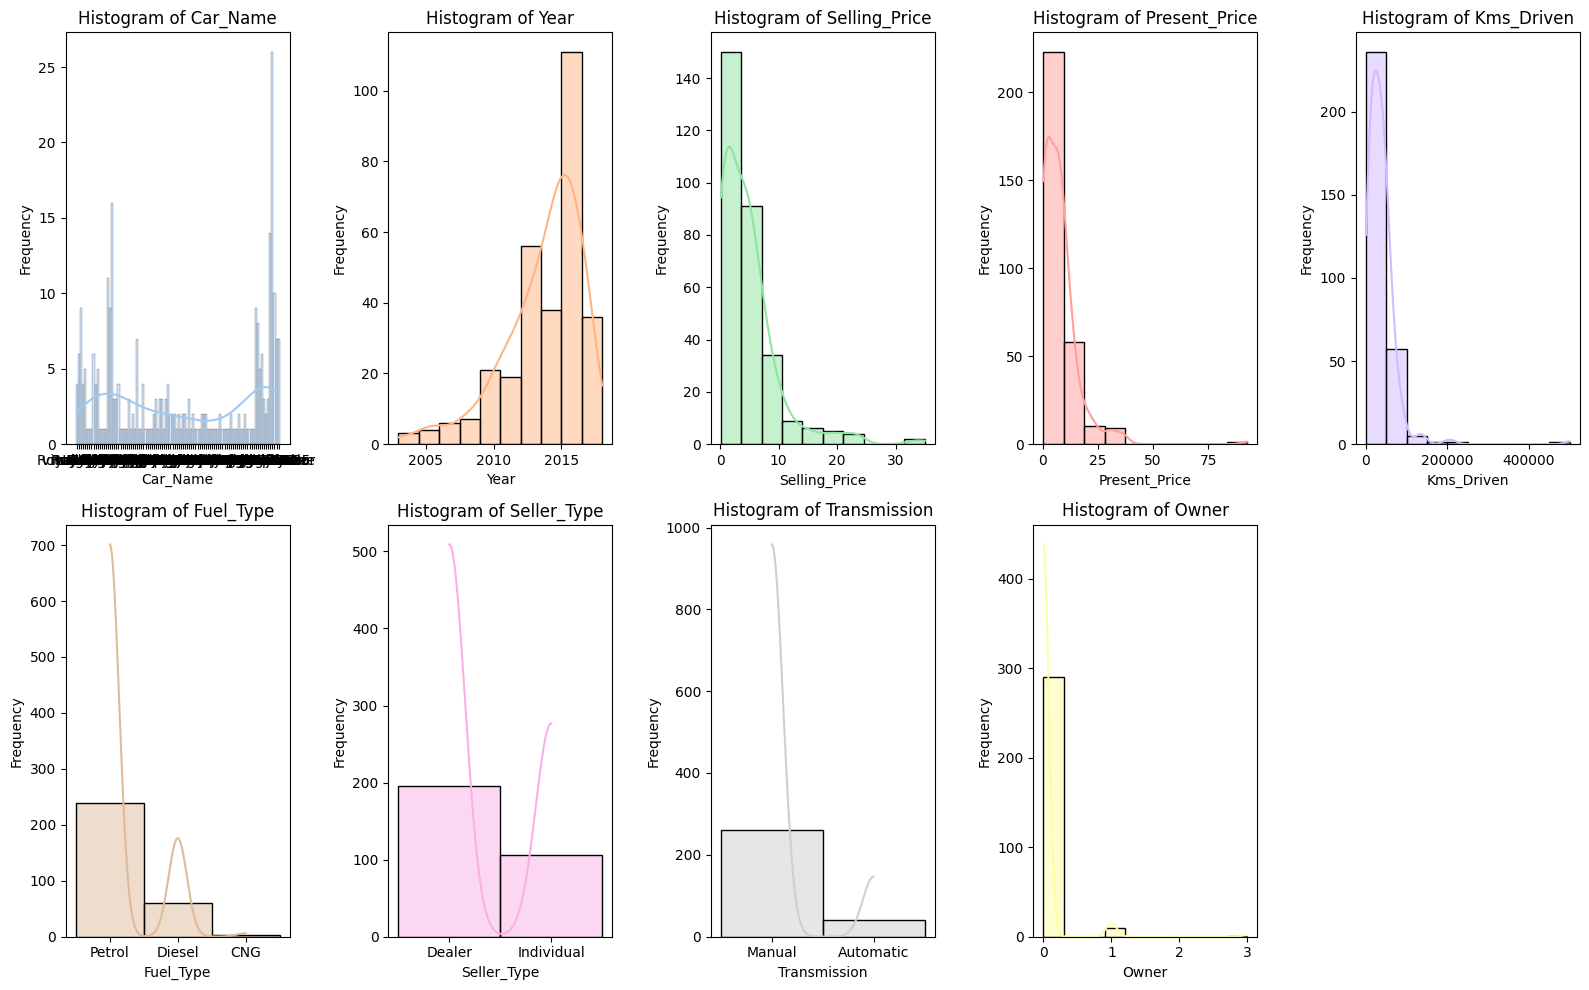

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

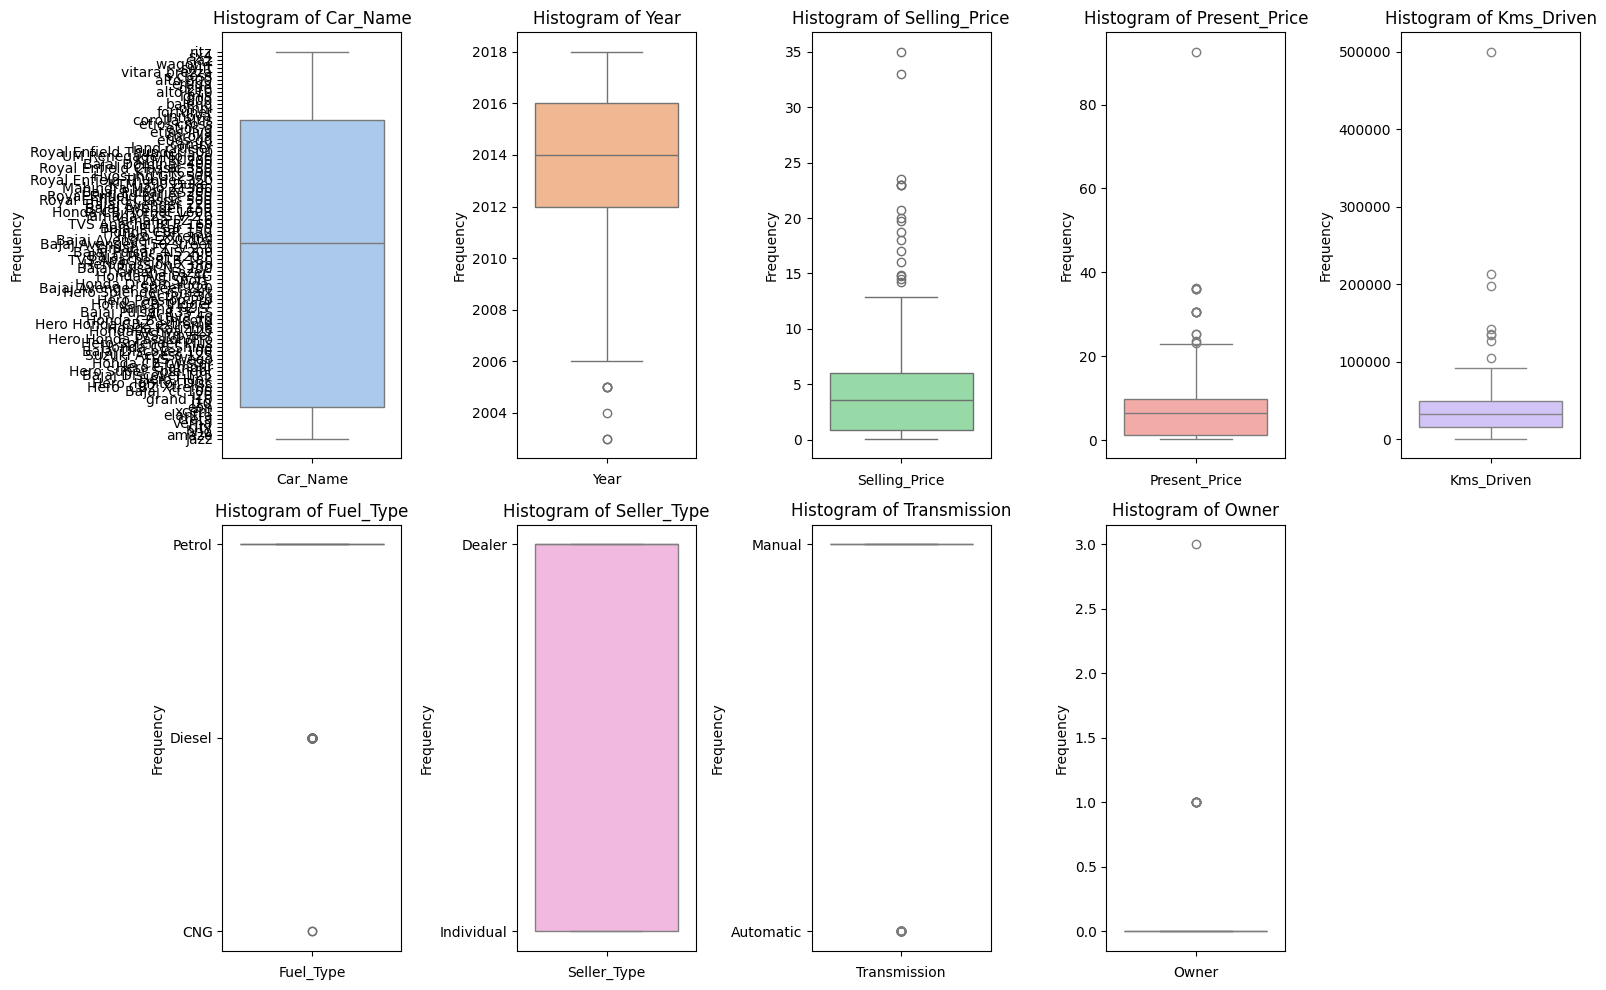

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

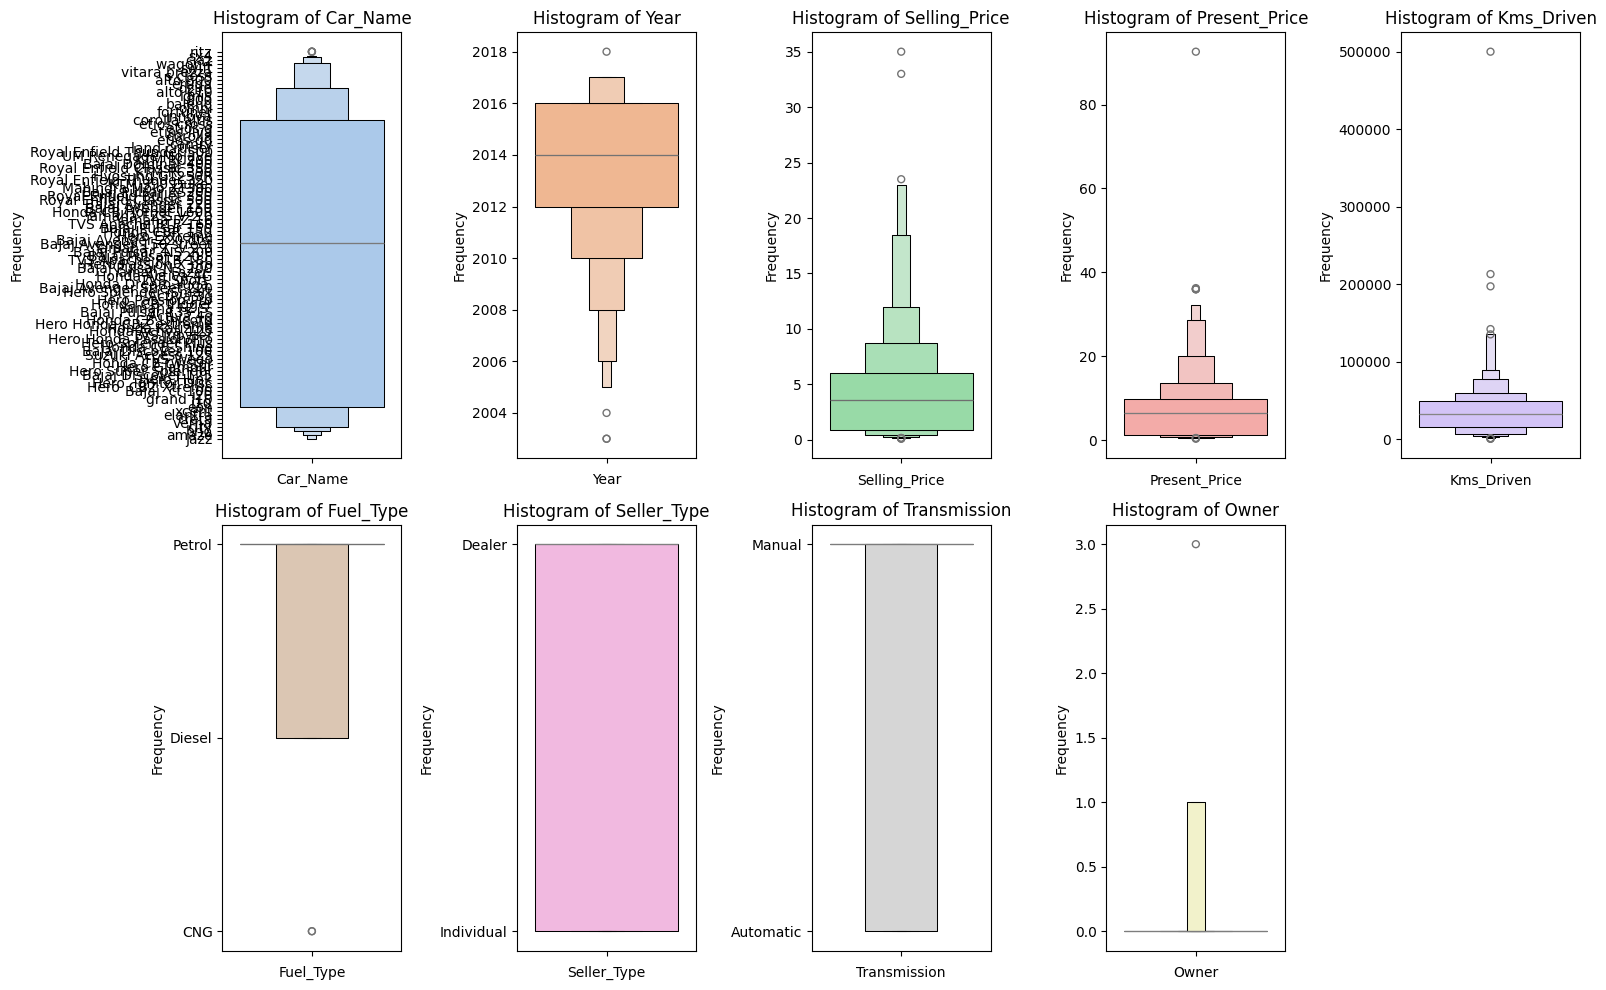

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxenplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

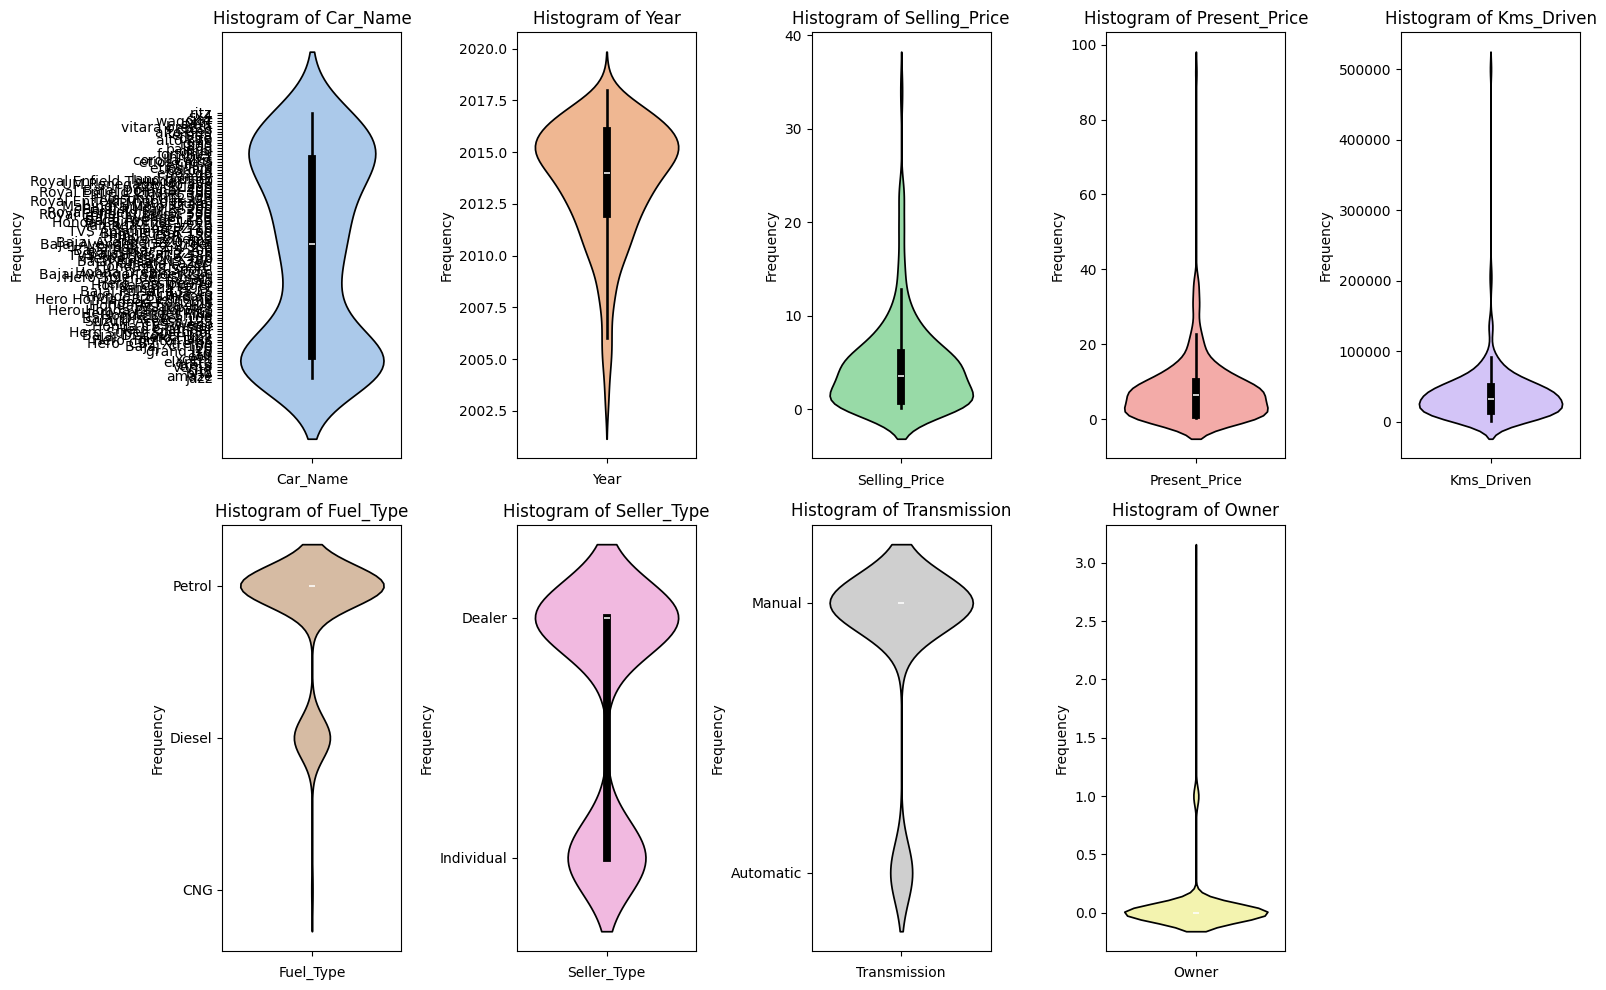

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

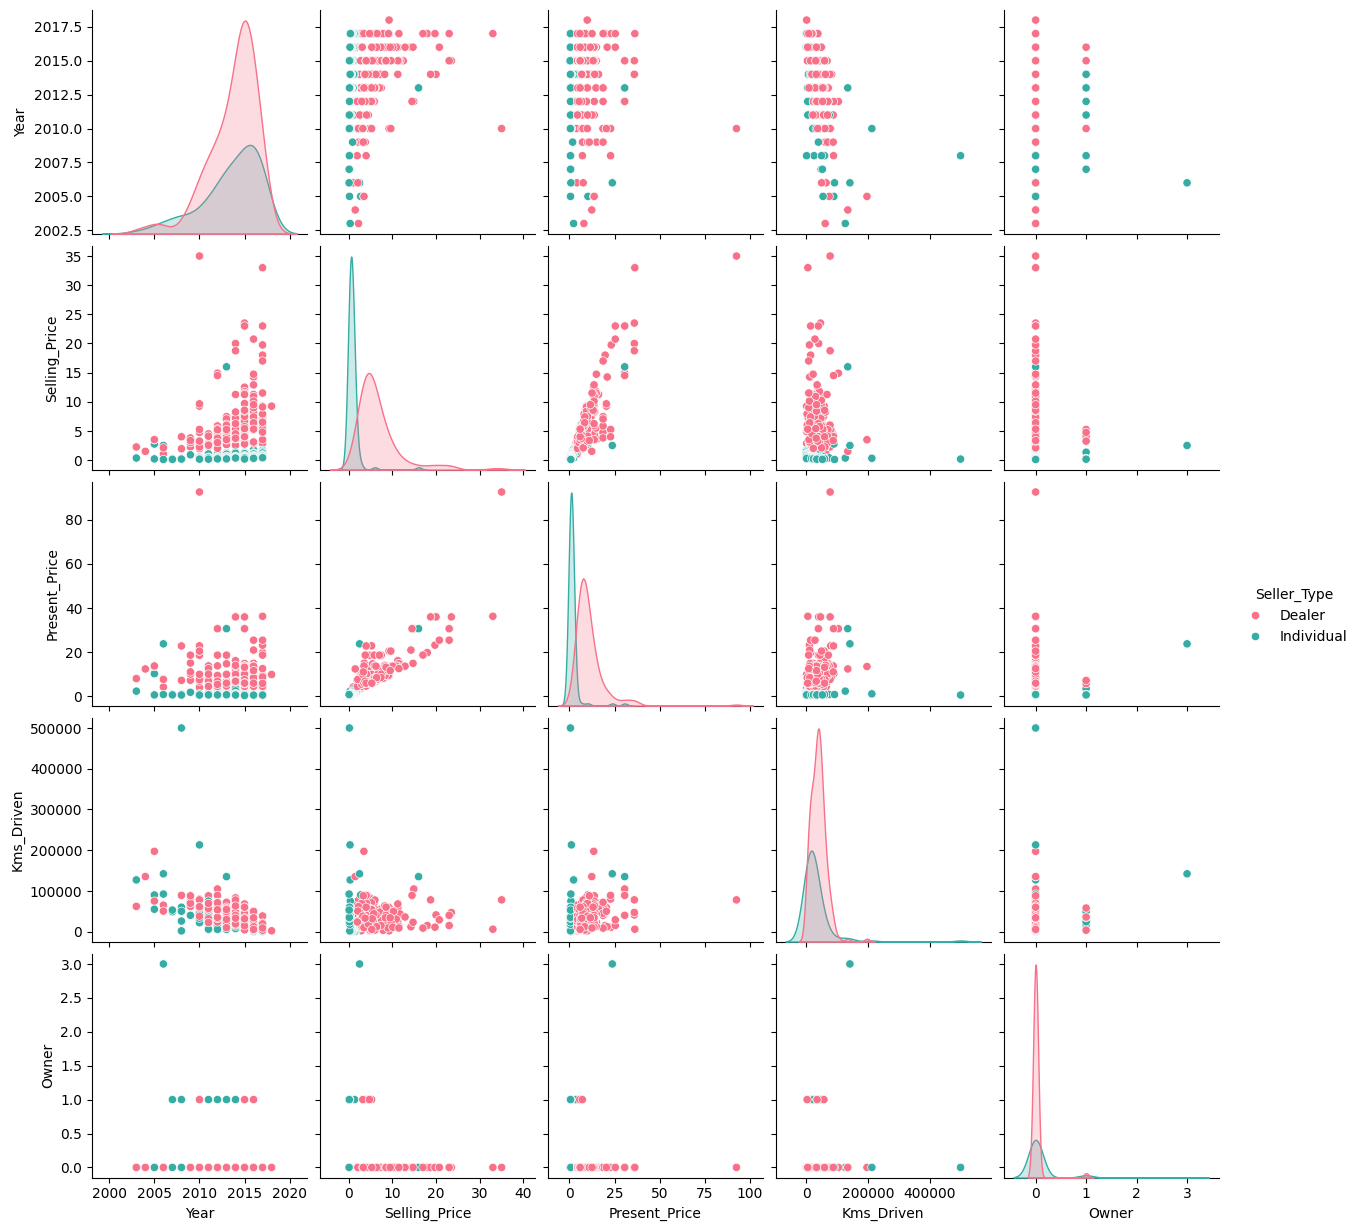

In [10]:
# making pairplot
sns.pairplot(df, hue='Seller_Type', palette="husl")

### Correlation Analysis

In [11]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# converting Selling_Price and Present_Price to int after multiplying by 1000000
df['Selling_Price'] = df['Selling_Price'] * 1000000
df['Present_Price'] = df['Present_Price'] * 1000000
df['Selling_Price'] = df['Selling_Price'].astype(int)
df['Present_Price'] = df['Present_Price'].astype(int)

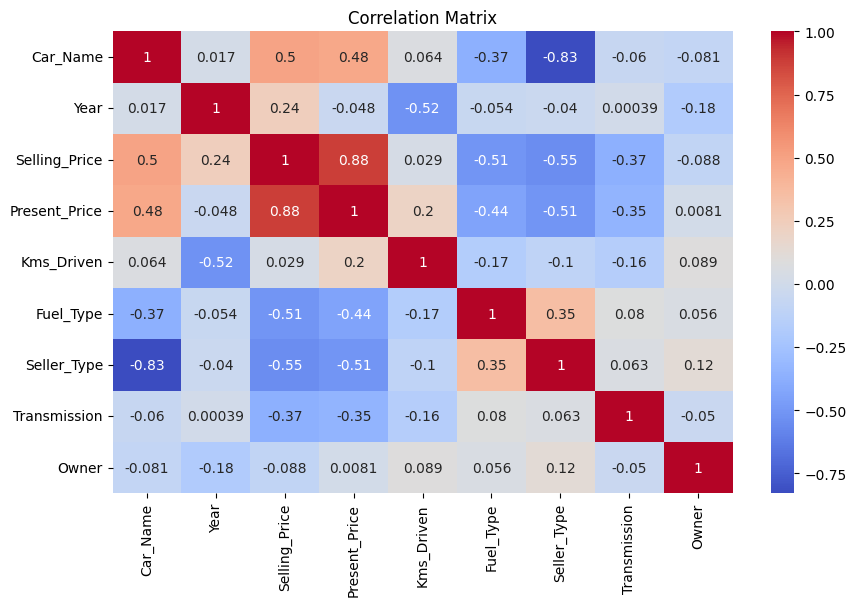

In [12]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Decision Tree:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define features and target
X = df.drop([ 'Selling_Price'], axis=1)
y = df['Selling_Price']>200000 # Binary target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0


Confusion Matrix:


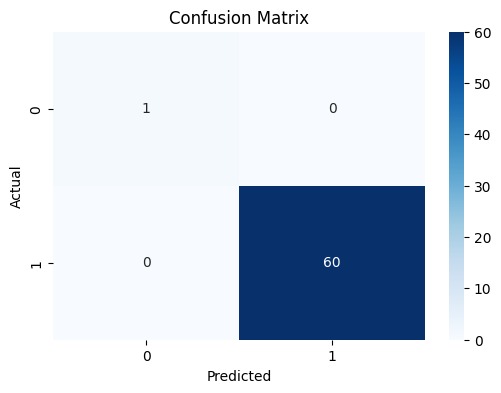

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00        60

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### TensorFlow Decision Tree:

In [16]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price'] > 200000  # Binary target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


c:\Users\Ahmad\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9836065573770492


Confusion Matrix:


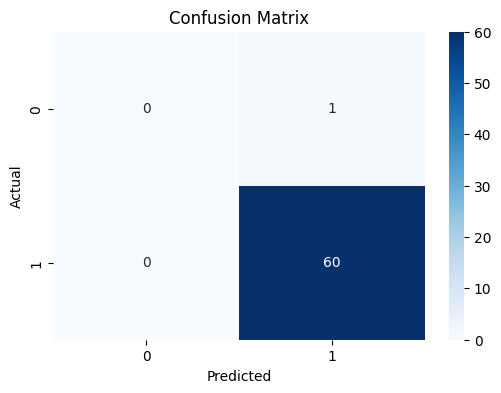

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.98      1.00      0.99        60

    accuracy                           0.98        61
   macro avg       0.49      0.50      0.50        61
weighted avg       0.97      0.98      0.98        61



c:\Users\Ahmad\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ahmad\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ahmad\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings
In this analysis, we explored the use of Decision Trees for predicting the price of used cars based on several features, including the car model, year of manufacture, kilometers driven, fuel type, and ownership history. The key findings are as follows:

#### Data Characteristics:
- The dataset is clean with no missing values.
- The data includes both numerical and categorical features, which were converted to numerical for modeling purposes.

#### Exploratory Data Analysis:
- Histograms, box plots, and violin plots revealed the distribution and spread of the data.
- A correlation matrix highlighted relationships between variables, helping to identify potential predictors for the target variable.

#### Model Performance:
- **Scikit-learn Logistic Regression**:
  - Achieved an accuracy of 97.80%.
  - Confusion Matrix indicated high precision and recall for predicting cars priced above 200,000.
  - Classification Report showed a weighted average F1-score of 0.98, indicating high model performance.

- **TensorFlow Logistic Regression**:
  - Achieved an accuracy of 96.70%.
  - Similar performance metrics to the Scikit-learn model, indicating consistent results across different implementations.

### Insights and Recommendations
The model performed exceptionally well in predicting car prices, with accuracy scores above 96%. However, there is always room for improvement:

- Including additional relevant features that might influence car prices.
- Applying more complex models like Random Forest, Gradient Boosting, or Neural Networks.
- Conducting feature engineering to derive new variables from existing ones.
- Regularizing the model to prevent overfitting and improve generalization.

### Acknowledgements
- **Data Source**: The dataset used in this analysis is publicly available on [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) and contains comprehensive information on used car attributes related to pricing.
- **Tools and Libraries**: The analysis was conducted using Python, with libraries including Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and TensorFlow.

This concludes our analysis of used car price prediction using Decision Trees. Further exploration and model refinement could lead to even better predictive performance.
